In [56]:
import pandas as pd
import notebook as nbook
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats

In [10]:
data= pd.read_csv('C:\python-main\ML\data\smoke_detector_task.csv')

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\IronSmail\AppData\Local\Temp\ipykernel_11452\4173204915.py:1: SyntaxWarning: invalid escape sequence '\p'
  data= pd.read_csv('C:\python-main\ML\data\smoke_detector_task.csv')


### Информация о данных

- Unnamed 0: Индекс
- UTC: Координированное всемирное время
- Temperature[C]: Температура в Цельсиях
- Humidity[%]: Относительная влажность воздуха
- TVOC[ppb]: общее содержание летучих органических соединений в частицах на миллиард
- eCO2[ppm]: эквивалентный уровень углекислого газа в частях на миллион
- Raw H2: необработанное значение уровня водорода
- Raw Ethanol: необработанное значение уровня этанола.
- Pressure[hPa]: атмосферное давление в гектопаскалях 
- PM1.0: концентрация частиц размером 1 микрометр и меньше.
- PM2.5: концентрация частиц размером 2.5 микрометра и меньше.       
- NC0.5: количество частиц размером 0.5 микрометра и меньше.
- NC1.0: количество частиц размером 1 микрометр и меньше. 
- NC2.5: количество частиц размером 2.5 микрометра и меньше.    
- CNT: общее количество частиц. 
- Fire Alarm: Сигнализация пожара

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62484 non-null  float64
 3   Humidity[%]     62383 non-null  float64
 4   TVOC[ppb]       62009 non-null  float64
 5   eCO2[ppm]       62305 non-null  float64
 6   Raw H2          62519 non-null  float64
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62603 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62313 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62378 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  object 
dtypes: float64(11), int64(4), object(1)
memory usage: 7.6+ MB


### Первые 15 записей

Судя по тому, как в UTC и Temperature[C] значения расположены по возрастанию с небольшой разницей, в данном датасете представлены показания одного или нескольких датчиков в одном месте

In [12]:
data.head(15)

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0.0,400.0,12306.0,18520,939.735,0.00,0.00,0.0,0.000,0.000,0,No
1,1,1654733332,20.015,56.67,0.0,400.0,12345.0,18651,939.744,0.00,0.00,0.0,0.000,0.000,1,No
2,2,1654733333,20.029,55.96,0.0,400.0,12374.0,18764,939.738,0.00,0.00,0.0,0.000,0.000,2,No
3,3,1654733334,20.044,55.28,0.0,400.0,12390.0,18849,939.736,0.00,0.00,0.0,0.000,0.000,3,No
4,4,1654733335,20.059,54.69,0.0,400.0,12403.0,18921,939.744,0.00,0.00,0.0,0.000,0.000,4,No
5,5,1654733336,20.073,54.12,0.0,400.0,12419.0,18998,939.725,0.00,0.00,0.0,0.000,0.000,5,No
6,6,1654733337,20.088,53.61,0.0,400.0,12432.0,19058,939.738,0.00,0.00,0.0,0.000,0.000,6,No
7,7,1654733338,20.103,53.20,0.0,400.0,12439.0,19114,939.758,0.00,0.00,0.0,0.000,0.000,7,No
8,8,1654733339,20.117,52.81,0.0,400.0,12448.0,19155,939.758,0.00,0.00,0.0,0.000,0.000,8,No
9,9,1654733340,20.132,52.46,0.0,400.0,12453.0,19195,939.756,0.90,3.78,0.0,4.369,2.780,9,No


### Чистка данных

In [13]:
data = data.drop('Unnamed: 0', axis=1)

In [14]:
data = data.sort_values('UTC')

In [15]:
data['Fire Alarm'] = data['Fire Alarm'].map({'Yes': True, 'No': False}).astype(bool)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62630 entries, 51142 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             62630 non-null  int64  
 1   Temperature[C]  62484 non-null  float64
 2   Humidity[%]     62383 non-null  float64
 3   TVOC[ppb]       62009 non-null  float64
 4   eCO2[ppm]       62305 non-null  float64
 5   Raw H2          62519 non-null  float64
 6   Raw Ethanol     62630 non-null  int64  
 7   Pressure[hPa]   62603 non-null  float64
 8   PM1.0           62630 non-null  float64
 9   PM2.5           62313 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62378 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  CNT             62630 non-null  int64  
 14  Fire Alarm      62630 non-null  bool   
dtypes: bool(1), float64(11), int64(3)
memory usage: 7.2 MB


### Статистические данные

- Количество
- Среднее
- Стандартное отклонение
- Квантиль 25%
- Квантиль 50% (медиана)
- Квантиль 75%
- Максимальное значение

In [17]:
data.describe() #Вывод статистических данных

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
count,6.263000e+04,62484.000000,62383.000000,62009.000000,62305.000000,62519.000000,62630.000000,62603.000000,62630.000000,62313.000000,62630.000000,62378.000000,62630.000000,62630.000000
mean,1.654792e+09,15.972252,48.536969,1944.124030,670.574994,12942.383835,19754.257912,938.627644,100.594309,184.443467,491.463608,203.382660,80.049042,10511.386157
std,1.100025e+05,14.361206,8.868993,7819.668069,1909.675941,272.531480,609.513156,1.331169,922.524245,1976.590473,4265.661251,2214.719662,1083.383189,7597.870997
min,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.654743e+09,11.000500,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000
50%,1.654762e+09,20.130000,50.140000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.942000,0.044000,9336.000000
75%,1.654778e+09,25.410000,53.240000,1189.000000,438.000000,13108.000000,20078.000000,939.417000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000
max,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000


In [18]:
max(data['UTC'])

1655130051

- Время изменяется от 1654712187 (четверг, 9 июня 2022 г., 0:16:27 GMT+06:00) до 1655130051 (понедельник, 13 июня 2022 г., 20:20:51 GMT+06:00)

- Температура варьируется от -22, до +60 градусов цельсия без больших скачков, видимо пожаров не возникало, а изменения температуры вызваны погодными условиями и сменой дня и ночи. Также стоит отметить, что при очень низких и высоких показателях датчики могут ложно сработать

- Среднее значение TVOC: 1944.12 ppb, с минимальным значением 0 ppb и максимальным 60000 ppb. Высокие уровни TVOC могут указывать на загрязнение воздуха. Возрастает при горении, наличии дыма

- При горении выделяется eCO2 (углекислый газ), так что высокие уровни указывают на горение или на загрязнение воздуха
- Аналогично углекислому газу, высокий H2 указывает на горение 

- Среднее атмосферное давление около 940 гПа или 700 мм рт.ст. Обычно атмосферное давление около 762 мм рт.ст., каждые 10м подъема снижают давление на 1 единицу, а значит в нашем случае датчик дыма находится в горах высотой около 600 м, а в горах имеет место высотная поясность, что может объяснить вышеописанные колебания температуры от -20 до +60 

- Влажность воздуха колеблется между 10 и 75 процентами. Высокая влажность может повлиять на работу датчиков, приводя к ложным срабатываниям

- PM1.0, PM2.5, NC0.5, NC1.0, NC2.5, CNT являются основными причинами срабатывания датчиков дыма. Резкий рост PM2.5 и NC1.0 почти гарантированно вызовет срабатывание

### Анализ пропущенных значений

In [19]:
data.isnull().sum().sort_values(ascending=False) 

TVOC[ppb]         621
eCO2[ppm]         325
PM2.5             317
NC1.0             252
Humidity[%]       247
Temperature[C]    146
Raw H2            111
Pressure[hPa]      27
UTC                 0
Raw Ethanol         0
PM1.0               0
NC0.5               0
NC2.5               0
CNT                 0
Fire Alarm          0
dtype: int64

### Заполнение пропусков данных

'NC0.5', 'NC1.0', 'NC2.5' скорее всего сильно связаны между собой, как и 'PM1.0', 'PM2.5', проверим heatmap матрицы корреляции числовых признаков

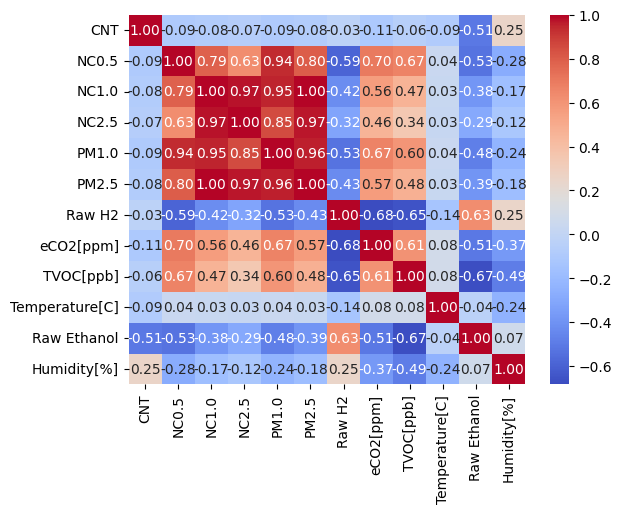

In [20]:
corr = data[['CNT','NC0.5', 'NC1.0', 'NC2.5','PM1.0', 'PM2.5', 'Raw H2', 'eCO2[ppm]', 'TVOC[ppb]', 'Temperature[C]','Raw Ethanol','Humidity[%]']].corr(method='pearson')
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [21]:
data['Temperature[C]'] = data['Temperature[C]'].interpolate(method='linear')
data['TVOC[ppb]'] = data['TVOC[ppb]'].fillna(data['TVOC[ppb]'].median())
data['eCO2[ppm]'] = data['eCO2[ppm]'].fillna(data['eCO2[ppm]'].median())
data['PM2.5'] = data['PM2.5'].fillna(data['PM2.5'].median())
data['NC1.0'] = data['NC1.0'].fillna(data['NC1.0'].median())
data['Raw H2'] = data['Raw H2'].fillna(data['Raw H2'].median())
data['Pressure[hPa]'] = data['Pressure[hPa]'].fillna(data['Pressure[hPa]'].mean())


data.isnull().sum().sort_values(ascending=False) 

Humidity[%]       247
UTC                 0
Temperature[C]      0
TVOC[ppb]           0
eCO2[ppm]           0
Raw H2              0
Raw Ethanol         0
Pressure[hPa]       0
PM1.0               0
PM2.5               0
NC0.5               0
NC1.0               0
NC2.5               0
CNT                 0
Fire Alarm          0
dtype: int64

### Удаление дубликатов

In [22]:
data.duplicated().sum() 
data = data.drop_duplicates()
data.duplicated().sum()

np.int64(0)

### Итоговая сводка

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62630 entries, 51142 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             62630 non-null  int64  
 1   Temperature[C]  62630 non-null  float64
 2   Humidity[%]     62383 non-null  float64
 3   TVOC[ppb]       62630 non-null  float64
 4   eCO2[ppm]       62630 non-null  float64
 5   Raw H2          62630 non-null  float64
 6   Raw Ethanol     62630 non-null  int64  
 7   Pressure[hPa]   62630 non-null  float64
 8   PM1.0           62630 non-null  float64
 9   PM2.5           62630 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62630 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  CNT             62630 non-null  int64  
 14  Fire Alarm      62630 non-null  bool   
dtypes: bool(1), float64(11), int64(3)
memory usage: 7.2 MB


In [24]:
data.head(15)

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
51142,1654712187,27.45,43.27,48.0,488.0,12844.0,20723,937.586,2.04,2.12,14.05,2.191,0.049,0,False
51143,1654712188,27.41,43.54,32.0,457.0,12857.0,20743,937.589,2.16,2.24,14.83,2.313,0.052,1,False
51144,1654712189,27.36,43.76,34.0,455.0,12857.0,20747,937.604,2.19,2.28,15.07,2.350,0.053,2,False
51145,1654712190,27.32,43.84,29.0,454.0,12858.0,20752,937.610,2.24,2.32,15.39,2.400,0.054,3,True
51146,1654712191,27.27,43.98,28.0,456.0,12860.0,20751,937.601,2.26,2.35,15.58,2.429,0.055,4,True
51147,1654712192,27.22,44.09,19.0,449.0,12862.0,20754,937.583,2.29,2.38,15.78,2.460,0.056,5,False
51148,1654712193,27.22,44.13,33.0,463.0,12860.0,20746,937.575,2.36,2.45,16.21,2.528,0.057,6,False
51149,1654712194,27.20,44.20,43.0,454.0,12854.0,20738,937.580,2.41,2.50,16.58,2.585,0.058,7,False
51150,1654712195,27.16,44.27,27.0,440.0,12861.0,20749,937.565,2.44,2.53,16.79,2.618,0.059,8,False
51151,1654712196,27.15,44.37,29.0,461.0,12861.0,20743,937.566,2.43,2.53,16.75,2.612,0.059,9,False


### EDA

In [25]:
data.describe()[['CNT','NC0.5', 'NC1.0', 'NC2.5','PM1.0', 'PM2.5', 'Raw Ethanol', 'Raw H2', 'eCO2[ppm]', 'TVOC[ppb]', 'Humidity[%]', 'Temperature[C]']]

,CNT,NC0.5,NC1.0,NC2.5,PM1.0,PM2.5,Raw Ethanol,Raw H2,eCO2[ppm],TVOC[ppb],Humidity[%],Temperature[C]
count,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62383.000000,62630.000000
mean,10511.386157,491.463608,202.572138,80.049042,100.594309,183.519427,19754.257912,12942.351253,669.170924,1934.574293,48.536969,15.970430
std,7597.870997,4265.661251,2210.296279,1083.383189,922.524245,1971.624384,609.513156,272.290962,1904.813775,7781.388564,8.868993,14.359576
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15317.000000,10668.000000,400.000000,0.000000,10.740000,-22.010000
25%,3625.250000,8.820000,1.392000,0.033000,1.280000,1.350000,19435.000000,12830.000000,400.000000,132.000000,47.530000,10.994250
50%,9336.000000,12.450000,1.942000,0.044000,1.810000,1.880000,19501.000000,12924.000000,400.000000,981.000000,50.140000,20.130000
75%,17164.750000,14.420000,2.247000,0.051000,2.090000,2.180000,20078.000000,13108.000000,437.000000,1187.000000,53.240000,25.410000
max,24993.000000,61482.030000,51914.680000,30026.438000,14333.690000,45432.260000,21410.000000,13803.000000,60000.000000,60000.000000,75.200000,59.930000


Без лог шкалы:

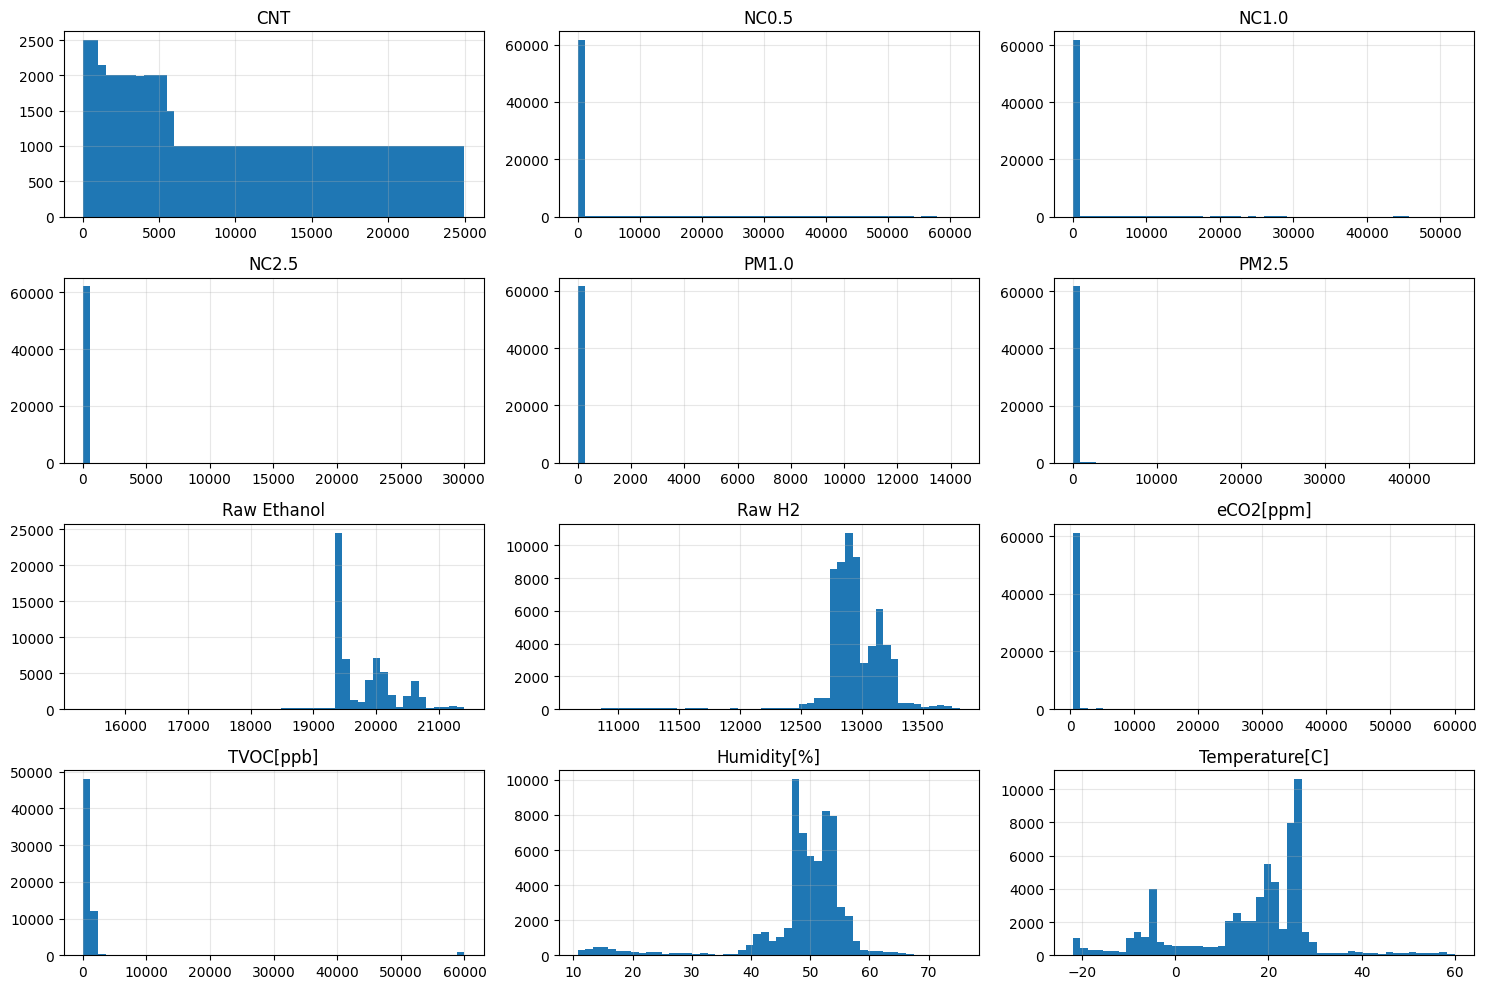

In [53]:
columns = ['CNT','NC0.5', 'NC1.0', 'NC2.5','PM1.0', 'PM2.5', 'Raw Ethanol', 'Raw H2', 'eCO2[ppm]', 'TVOC[ppb]', 'Humidity[%]', 'Temperature[C]']

plt.figure(figsize=(15, 10))

for i, column in enumerate(columns, 1):
    plt.subplot(4, 3, i) 
    data[column].hist(log=False, bins=50) 
    plt.title(column)
    plt.grid(True, which="both", ls="-", alpha=0.3) 

plt.tight_layout()  
plt.show()

С лог шкалой

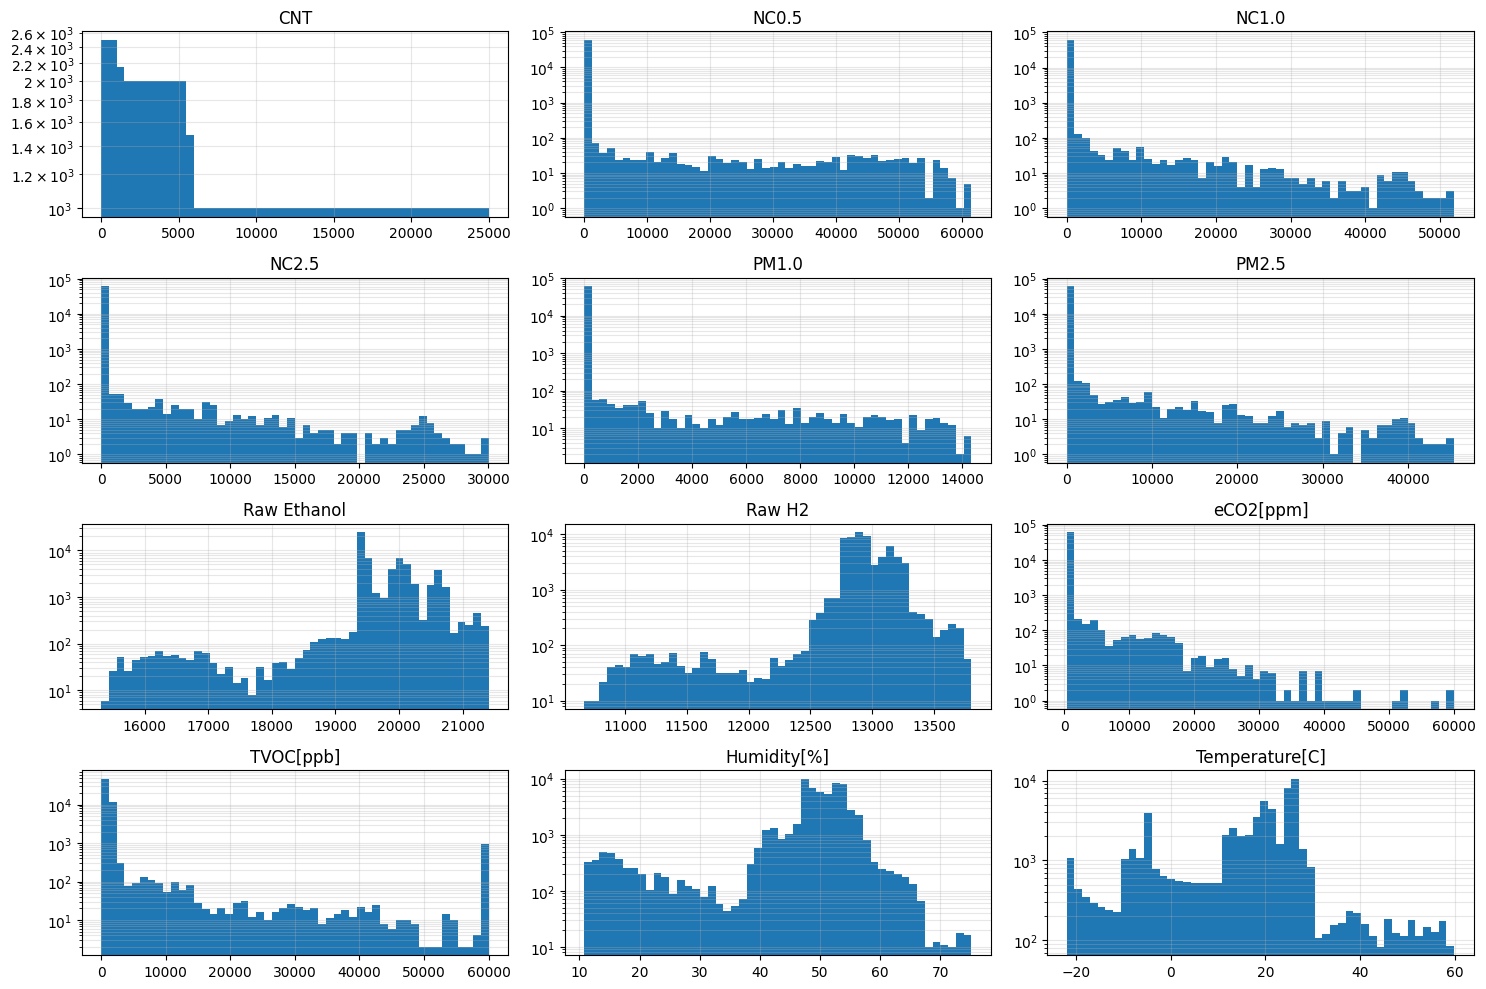

In [ ]:
columns = ['CNT','NC0.5', 'NC1.0', 'NC2.5','PM1.0', 'PM2.5', 'Raw Ethanol', 'Raw H2', 'eCO2[ppm]', 'TVOC[ppb]', 'Humidity[%]', 'Temperature[C]']

plt.figure(figsize=(15, 10))

for i, column in enumerate(columns, 1):
    plt.subplot(4, 3, i) 
    data[column].hist(log=True, bins=50) 
    plt.title(column)
    plt.grid(True, which="both", ls="-", alpha=0.3) 

plt.tight_layout()  
plt.show()

По всей видимости, ни один из факторов не распределен нормально


### Исключение выбросов

In [27]:
outlier = data[columns]
outlier

,CNT,NC0.5,NC1.0,NC2.5,PM1.0,PM2.5,Raw Ethanol,Raw H2,eCO2[ppm],TVOC[ppb],Humidity[%],Temperature[C]
51142,0,14.05,2.191,0.049,2.04,2.12,20723,12844.0,488.0,48.0,43.27,27.450
51143,1,14.83,2.313,0.052,2.16,2.24,20743,12857.0,457.0,32.0,43.54,27.410
51144,2,15.07,2.350,0.053,2.19,2.28,20747,12857.0,455.0,34.0,43.76,27.360
51145,3,15.39,2.400,0.054,2.24,2.32,20752,12858.0,454.0,29.0,43.84,27.320
51146,4,15.58,2.429,0.055,2.26,2.35,20751,12860.0,456.0,28.0,43.98,27.270
...,...,...,...,...,...,...,...,...,...,...,...,...
62625,5739,4.32,0.673,0.015,0.63,0.65,20569,13723.0,400.0,625.0,15.79,18.438
62626,5740,4.18,0.652,0.015,0.61,0.63,20588,13731.0,400.0,612.0,15.87,18.653
62627,5741,3.95,0.617,0.014,0.57,0.60,20582,13725.0,400.0,627.0,15.84,18.867
62628,5742,3.92,0.611,0.014,0.57,0.59,20566,13712.0,400.0,638.0,16.04,19.083


In [28]:
Q1 = outlier.quantile(0.25)
Q1

CNT                3625.25000
NC0.5                 8.82000
NC1.0                 1.39200
NC2.5                 0.03300
PM1.0                 1.28000
PM2.5                 1.35000
Raw Ethanol       19435.00000
Raw H2            12830.00000
eCO2[ppm]           400.00000
TVOC[ppb]           132.00000
Humidity[%]          47.53000
Temperature[C]       10.99425
Name: 0.25, dtype: float64

In [29]:
Q3 = outlier.quantile(0.75)
Q3

CNT               17164.750
NC0.5                14.420
NC1.0                 2.247
NC2.5                 0.051
PM1.0                 2.090
PM2.5                 2.180
Raw Ethanol       20078.000
Raw H2            13108.000
eCO2[ppm]           437.000
TVOC[ppb]          1187.000
Humidity[%]          53.240
Temperature[C]       25.410
Name: 0.75, dtype: float64

In [ ]:
IQR = Q3-Q1
data_filtered = outlier[~((outlier < (Q1 - 1.5 * IQR)) |(outlier > (Q3 + 1.5 * IQR))).any(axis=1)]
data_filtered

,CNT,NC0.5,NC1.0,NC2.5,PM1.0,PM2.5,Raw Ethanol,Raw H2,eCO2[ppm],TVOC[ppb],Humidity[%],Temperature[C]
51142,0,14.05,2.191,0.049,2.04,2.12,20723,12844.0,488.0,48.0,43.27,27.450
51143,1,14.83,2.313,0.052,2.16,2.24,20743,12857.0,457.0,32.0,43.54,27.410
51144,2,15.07,2.350,0.053,2.19,2.28,20747,12857.0,455.0,34.0,43.76,27.360
51145,3,15.39,2.400,0.054,2.24,2.32,20752,12858.0,454.0,29.0,43.84,27.320
51146,4,15.58,2.429,0.055,2.26,2.35,20751,12860.0,456.0,28.0,43.98,27.270
...,...,...,...,...,...,...,...,...,...,...,...,...
60940,4054,5.53,0.863,0.019,0.80,0.84,19941,13309.0,400.0,2704.0,54.27,16.751
60941,4055,5.47,0.853,0.019,0.79,0.83,19943,13316.0,400.0,2681.0,54.08,16.770
60942,4056,5.27,0.823,0.019,0.77,0.80,19937,13313.0,400.0,2746.0,53.91,16.788
60973,4087,3.08,0.480,0.011,0.45,0.47,19785,13248.0,400.0,981.0,56.37,17.367


In [31]:
index_list = list(data_filtered.index.values)

In [32]:

data_filtered = data[data.index.isin(index_list)]
data_filtered.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
51142,1654712187,27.45,43.27,48.0,488.0,12844.0,20723,937.586,2.04,2.12,14.05,2.191,0.049,0,False
51143,1654712188,27.41,43.54,32.0,457.0,12857.0,20743,937.589,2.16,2.24,14.83,2.313,0.052,1,False
51144,1654712189,27.36,43.76,34.0,455.0,12857.0,20747,937.604,2.19,2.28,15.07,2.350,0.053,2,False
51145,1654712190,27.32,43.84,29.0,454.0,12858.0,20752,937.610,2.24,2.32,15.39,2.400,0.054,3,True
51146,1654712191,27.27,43.98,28.0,456.0,12860.0,20751,937.601,2.26,2.35,15.58,2.429,0.055,4,True


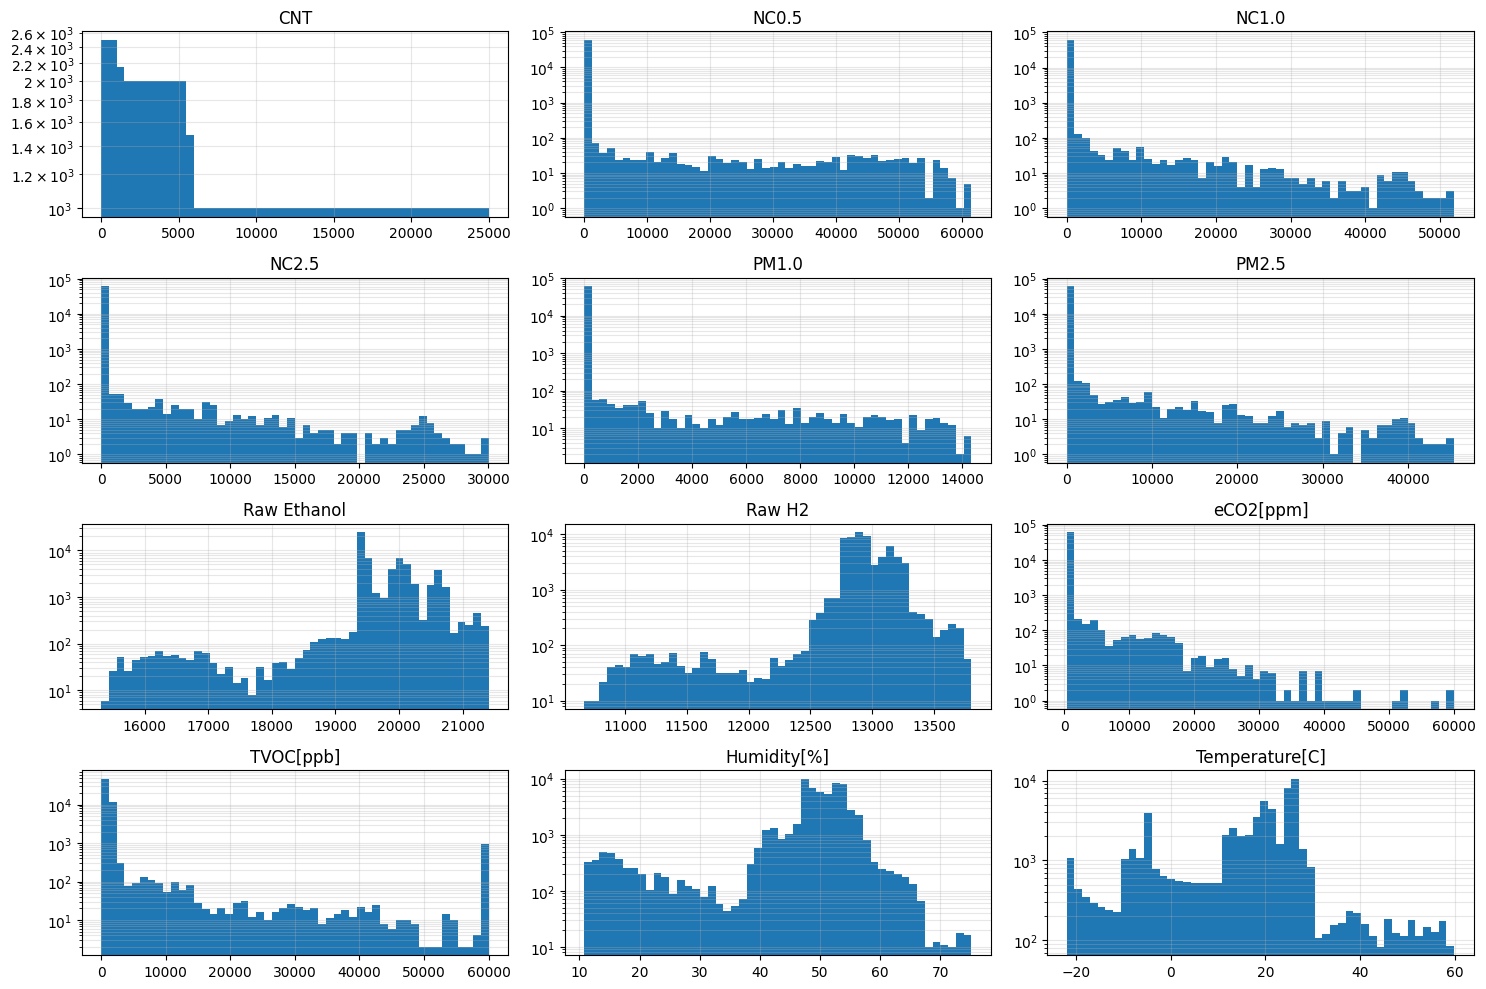

In [54]:
filtered_outlier = data_filtered[columns]

plt.figure(figsize=(15, 10))

for i, column in enumerate(filtered_outlier, 1):
    plt.subplot(4, 3, i) 
    data[column].hist(log=True, bins=50) 
    plt.title(column)
    plt.grid(True, which="both", ls="-", alpha=0.3) 

plt.tight_layout()  
plt.show()

## Изучение данных без выбросов

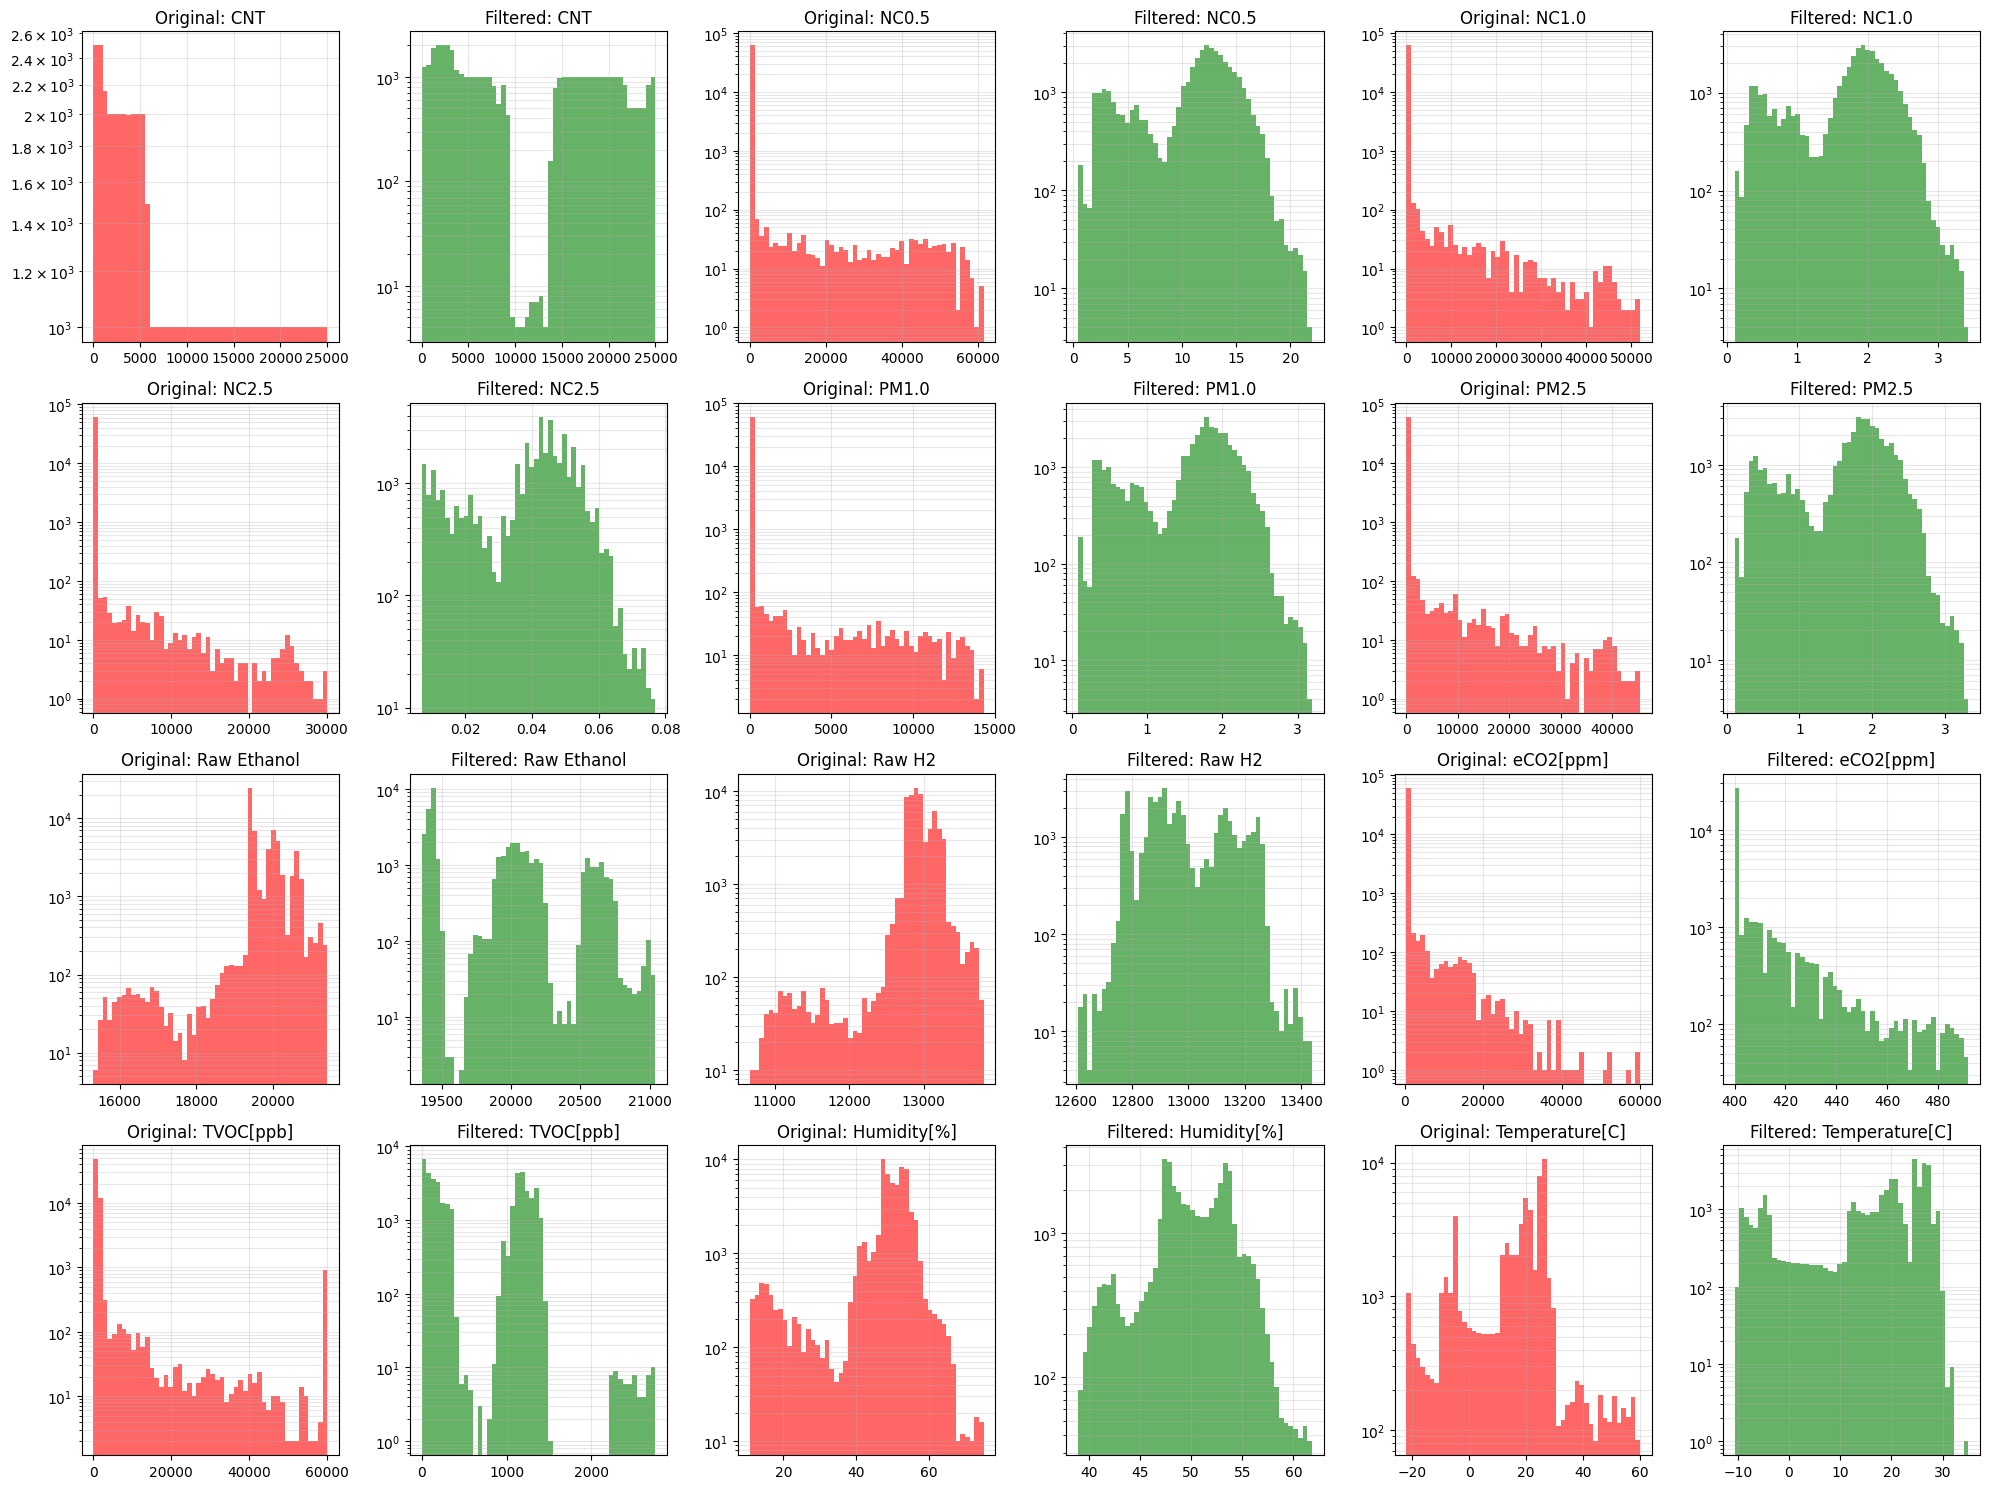

In [ ]:
plt.figure(figsize=(20, 15))  

for i, column in enumerate(columns, 1):
   
    plt.subplot(4, 6, 2*i - 1) 
    data[column].hist(log=True, bins=50, color='red', alpha=0.6)
    plt.title(f"Original: {column}")
    plt.grid(True, which="both", ls="-", alpha=0.3)
  
    plt.subplot(4, 6, 2*i) 
    filtered_outlier[column].hist(log=True, bins=50, color='green', alpha=0.6)
    plt.title(f"Filtered: {column}")
    plt.grid(True, which="both", ls="-", alpha=0.3)

plt.tight_layout()  
plt.show()

### Heatmap числовых данных

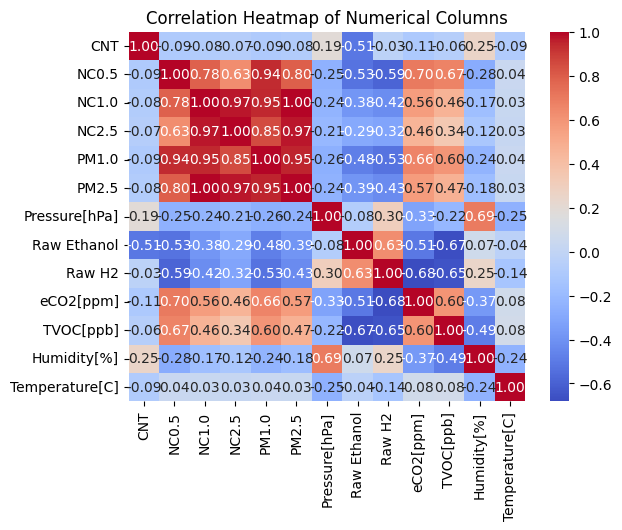

In [47]:
num_columns = ['CNT','NC0.5', 'NC1.0', 'NC2.5','PM1.0', 'PM2.5', 'Pressure[hPa]', 'Raw Ethanol', 'Raw H2', 'eCO2[ppm]', 'TVOC[ppb]', 'Humidity[%]', 'Temperature[C]']
data_num = data[num_columns]
corr_matrix = data_num.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()


### Корреляция числовых признаков с Fire Alarm

In [59]:
correlations = {}

for col in columns:
    corr, p_value = stats.pointbiserialr(data_filtered['Fire Alarm'], data_filtered[col])
    correlations[col] = {'correlation': corr, 'p-value': p_value}

sorted_correlations = sorted(correlations.items(), key=lambda x: abs(x[1]['correlation']), reverse=True)

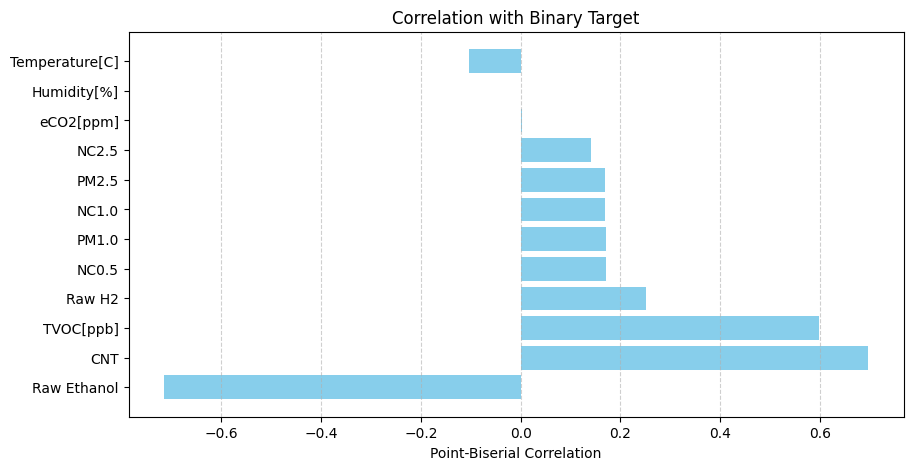

In [60]:
corr_df = pd.DataFrame({
    'Feature': [col for col, _ in sorted_correlations],
    'Correlation': [stat['correlation'] for _, stat in sorted_correlations]
})

# Строим график
plt.figure(figsize=(10, 5))
plt.barh(corr_df['Feature'], corr_df['Correlation'], color='skyblue')
plt.xlabel('Point-Biserial Correlation')
plt.title('Correlation with Binary Target')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()